In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from gplearn.genetic import SymbolicRegressor
import matplotlib.pyplot as plt

In [2]:
# CSV dosyasını oku
df = pd.read_csv("car_sales_data.csv")

# Sütun isimlerini listele
print("Sütunlar:", df.columns.tolist())

# Veri tipleri ve boş değer durumlarını öğren
print("\nVeri Bilgisi:")
print(df.info())

# İlk 5 satırı göster
print("\nİlk 5 Satır:")
print(df.head())

# Son 5 satırı görmek için
print("\nSon 5 Satır:")
print(df.tail())

# Sayısal sütunların istatistiksel özetini görmek için
print("\nİstatistiksel Özet:")
print(df.describe())

Sütunlar: ['Manufacturer', 'Model', 'Engine size', 'Fuel type', 'Year of manufacture', 'Mileage', 'Price']

Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB
None

İlk 5 Satır:
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford   

In [3]:
df_encoded = pd.get_dummies(df, columns=["Fuel type", "Manufacturer", "Model"], drop_first=True)

X = df_encoded.drop(columns=["Price"])
y = df_encoded["Price"]

X[["Year of manufacture"]] = 2025 - X[["Year of manufacture"]]
X = X.rename(columns={'Year of manufacture': 'Age of car'})
X[["Engine size", "Mileage", "Age of car"]] = ((X[["Engine size", "Mileage", "Age of car"]] - X[["Engine size", "Mileage", "Age of car"]].mean()) /
                                               X[["Engine size", "Mileage", "Age of car"]].std())
y = (y - y.mean()) / y.std()

In [4]:
X.head()

,Engine size,Age of car,Mileage,Fuel type_Hybrid,Fuel type_Petrol,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW,Model_911,...,Model_Golf,Model_M5,Model_Mondeo,Model_Passat,Model_Polo,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4
0,-1.053058,0.229053,0.206647,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.033535,-1.222331,-0.762884,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.235739,-1.014990,-1.023381,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0.036700,1.680437,1.372515,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,-1.053058,-0.185628,0.214591,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [5]:
y.head()

0   -0.655120
1    2.185283
2    0.623944
3   -0.738511
4   -0.592562
Name: Price, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42 )

In [7]:
est_gp = SymbolicRegressor(
    population_size=5000,    # daha büyük popülasyon
    generations=30,
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.001,
    stopping_criteria=0.01,  # erken durdurmayı daha yüksek yap
    function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs'), # daha zengin fonksiyon seti
    metric='mse',             # optimizasyon kriteri
    n_jobs=-1,               # çok çekirdek
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.84          39.8432        3         0.497818         0.486635      1.73m
   1     4.48           1.2254        3         0.491221         0.546006      5.19m
   2     5.11          1.28293        5          0.46122         0.513757      4.62m
   3     4.35          1.47695        5         0.451305         0.490835      4.26m
   4     3.62          1.10749        5         0.449458         0.507463      4.81m
   5     4.94          1.06472       14         0.425359         0.455454      3.85m
   6     5.50          1.06498       13         0.409908         0.420127      3.81m
   7     6.49         0.955318       17         0.383758         0.374792      3.59m
   8    10.69         0.917975       20         0.375734         0.397948  

SymbolicRegressor(function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs'),
                  generations=30, max_samples=0.9, metric='mse', n_jobs=-1,
                  p_crossover=0.7, p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=5000, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [8]:
predictTest = pd.Series(est_gp.predict(X_train), index=X_train.index)
predictTest.head()

18306   -0.415059
49528    0.242205
44745    0.393881
46827    0.393881
27531    0.494998
dtype: float64

In [9]:
y_train.head()

18306   -0.628136
49528   -0.457334
44745    0.530625
46827    0.677183
27531    0.580818
Name: Price, dtype: float64

In [10]:
y_pred = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred.head()

33553    0.798350
9427     0.697233
199      0.444439
12447   -0.061148
39489   -0.212824
dtype: float64

In [11]:
y_test.head()

33553    3.336125
9427     1.306421
199      0.215701
12447   -0.646653
39489   -0.548034
Name: Price, dtype: float64

In [12]:
print("R2 Score of Train Samples: ", est_gp.score(X_train, y_train))
print("R2 Score of Test Samples: ", est_gp.score(X_test, y_test))

R2 Score of Train Samples:  0.7412656426855176
R2 Score of Test Samples:  0.7417100175342171


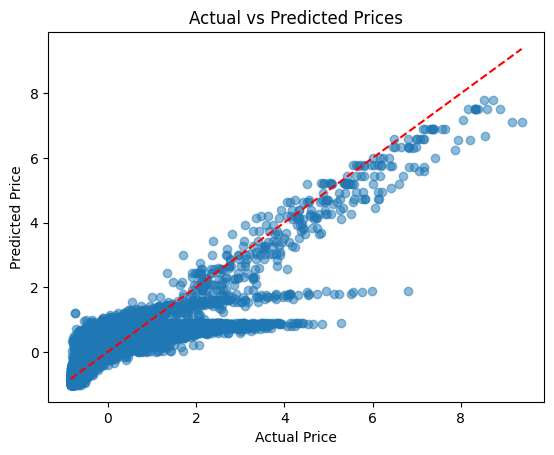

In [13]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()